# Histograms

matviz provides two main histogram functions:
- `nhist` — smart 1D histograms with automatic binning
- `ndhist` — 2D density histograms (heat maps)

Both use Scott's normal reference rule for bin selection and handle edge cases gracefully.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matviz.histogram_utils import nhist, ndhist
from matviz.viz import subplotter, title

## nhist — 1D Histograms

### Single array

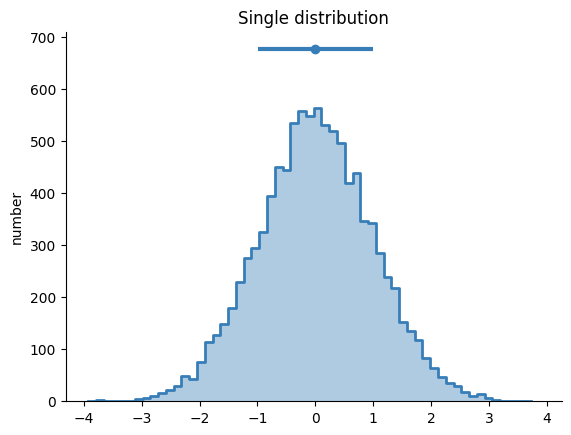

In [2]:
y = np.random.randn(10000)
fig = nhist(y)
title('Single distribution')
plt.show()

### Dictionary input — compare distributions

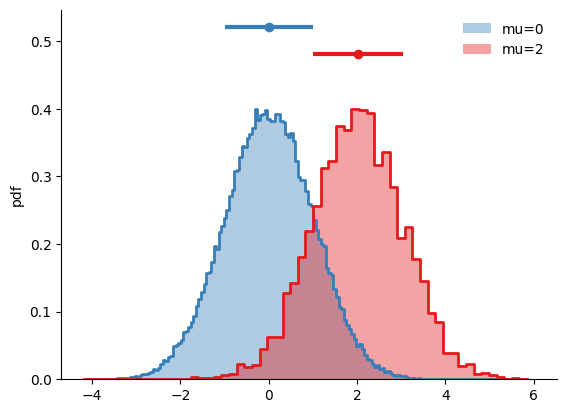

In [3]:
A = {'mu=0': np.random.randn(100000), 'mu=2': np.random.randn(5000) + 2}
fig = nhist(A)
plt.show()

### Key parameters

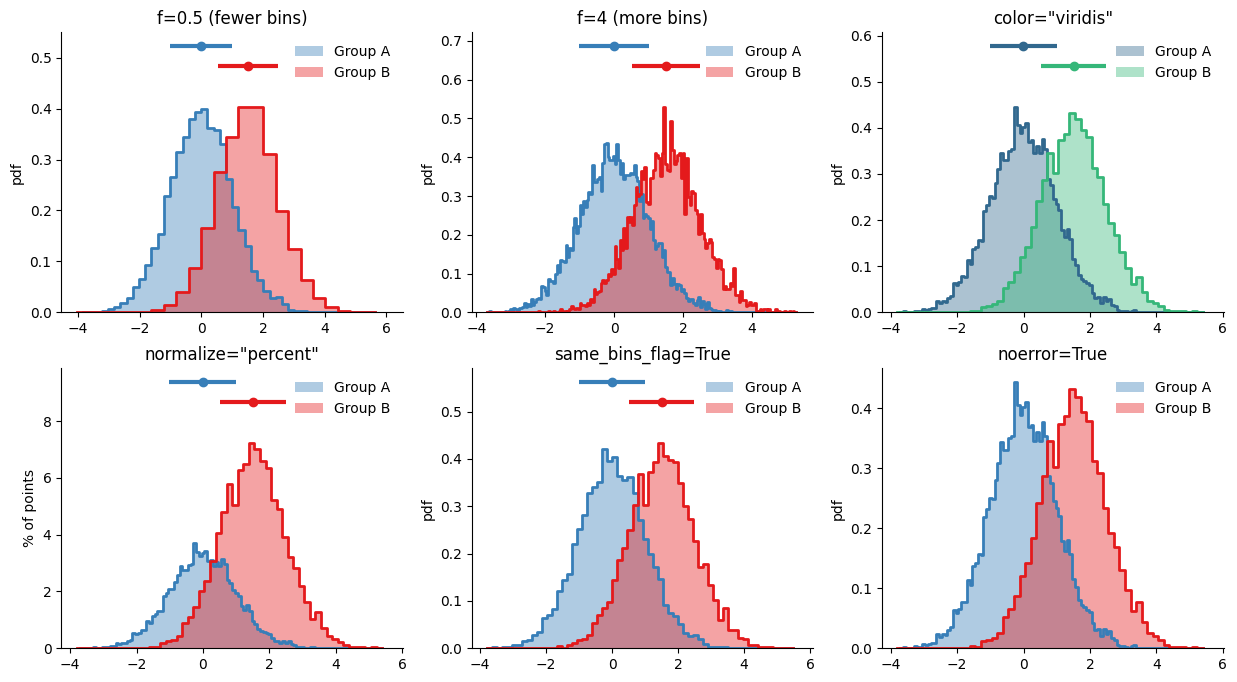

In [4]:
A = {'Group A': np.random.randn(10000), 'Group B': np.random.randn(5000) + 1.5}

plt.figure(figsize=(15, 8))

subplotter(2, 3, 0)
nhist(A, f=0.5)
title('f=0.5 (fewer bins)')

subplotter(2, 3, 1)
nhist(A, f=4)
title('f=4 (more bins)')

subplotter(2, 3, 2)
nhist(A, color='viridis')
title('color="viridis"')

subplotter(2, 3, 3)
nhist(A, normalize='percent')
title('normalize="percent"')

subplotter(2, 3, 4)
nhist(A, same_bins_flag=True)
title('same_bins_flag=True')

subplotter(2, 3, 5)
nhist(A, noerror=True)
title('noerror=True')

plt.show()

### Integer bins and axis limits

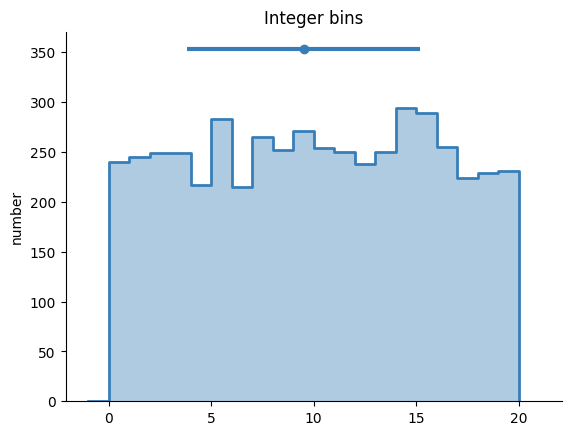

In [5]:
integers = np.random.randint(0, 20, 5000)
fig = nhist(integers, int_bins_flag=True)
title('Integer bins')
plt.show()

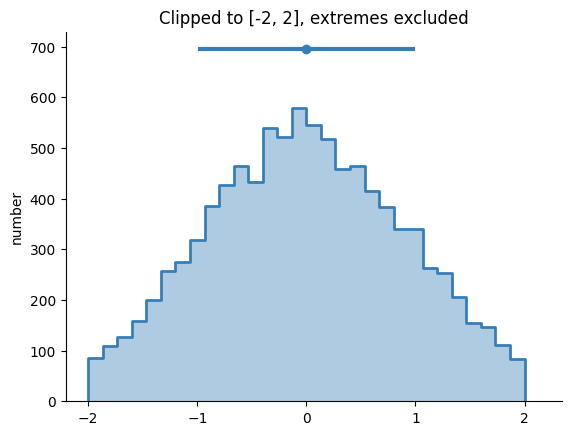

In [6]:
data = np.random.randn(10000)
fig = nhist(data, minx=-2, maxx=2, exclude_extremes=True)
title('Clipped to [-2, 2], extremes excluded')
plt.show()

### DataFrame input

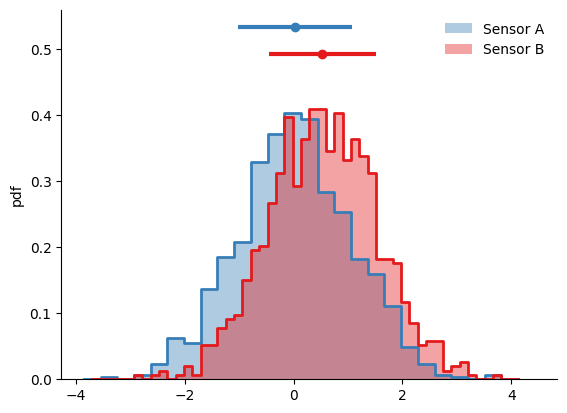

In [7]:
import pandas as pd

df = pd.DataFrame({
    'Sensor A': np.random.randn(1000),
    'Sensor B': np.random.randn(1000) + 0.5,
})
fig = nhist(df)
plt.show()

### Accessing return data

Bin counts: [ 0  1  2  5 12] ...
Bin edges: [-3.55368336 -3.26462916 -2.97557496 -2.68652076 -2.39746656] ...


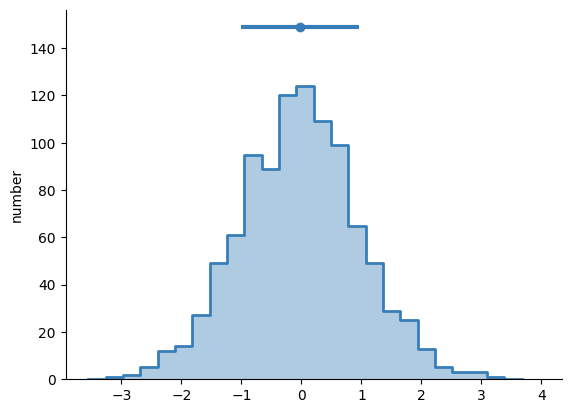

In [8]:
fig = nhist(np.random.randn(1000))
print('Bin counts:', fig.nhist['N'][0][:5], '...')
print('Bin edges:', fig.nhist['bins'][0][:5], '...')
plt.show()

## ndhist — 2D Histograms

### Basic 2D histogram

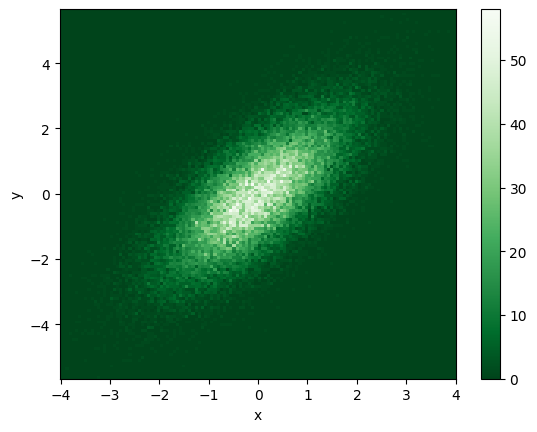

In [9]:
x = np.random.randn(50000)
y = x + np.random.randn(50000)
fig = ndhist(x, y)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Bin density with `f`, `fx`, `fy`

The `f` parameter controls bin density relative to the default (Scott's rule).
Use `fx` and `fy` to control x and y axes independently.

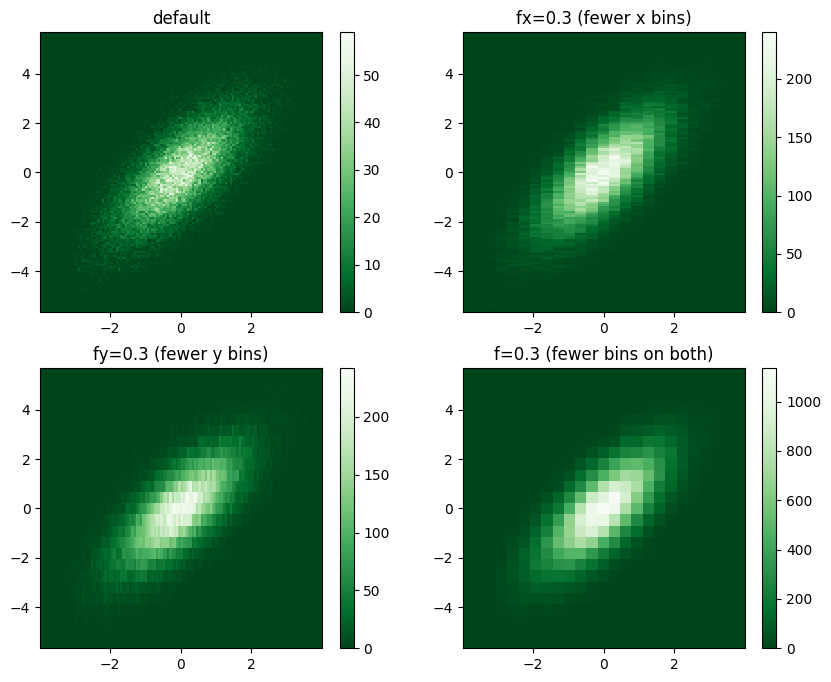

In [10]:
x = np.random.randn(50000)
y = x + np.random.randn(50000)

plt.figure(figsize=(10, 8))

subplotter(2, 2, 0)
ndhist(x, y)
title('default')
plt.colorbar()

subplotter(2, 2, 1)
ndhist(x, y, fx=0.3)
title('fx=0.3 (fewer x bins)')
plt.colorbar()

subplotter(2, 2, 2)
ndhist(x, y, fy=0.3)
title('fy=0.3 (fewer y bins)')
plt.colorbar()

subplotter(2, 2, 3)
ndhist(x, y, f=0.3)
title('f=0.3 (fewer bins on both)')
plt.colorbar()

plt.show()

### Complex numbers

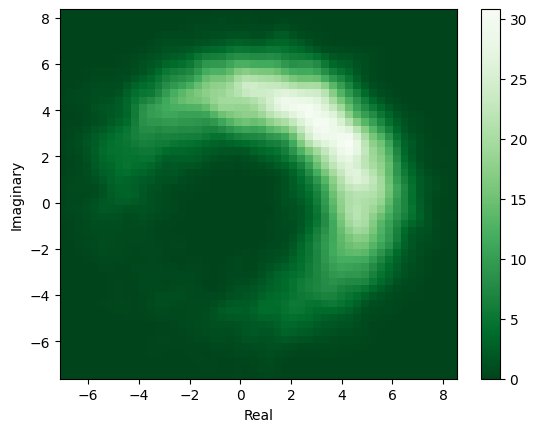

In [11]:
z = (5 + np.random.randn(10000)) * np.exp(1j * (np.random.randn(10000) + np.pi/4))
fig = ndhist(z, smooth=1)
plt.colorbar()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

### Time series mode

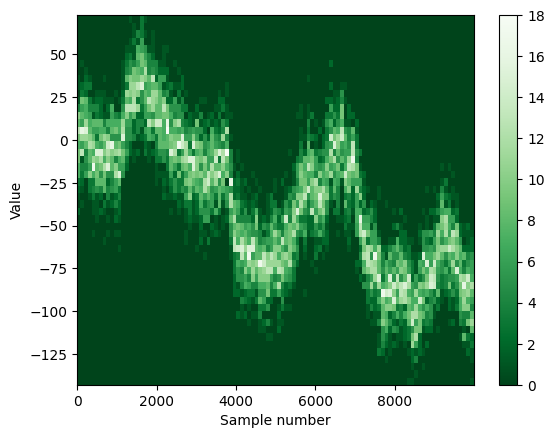

In [12]:
n = 10000
y = np.cumsum(np.random.randn(n)) + 15 * np.random.randn(n)
fig = ndhist(y, fx=5)
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.colorbar()
plt.show()

### Log colorbar

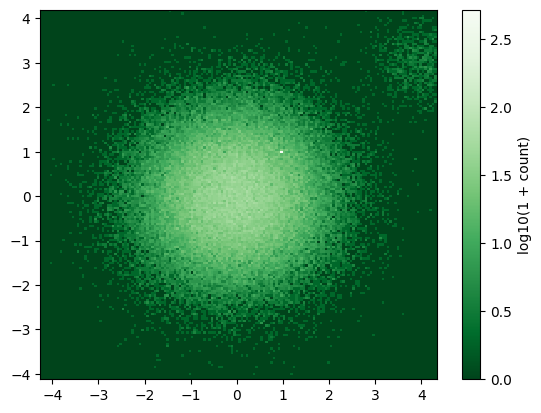

In [13]:
x = np.concatenate([np.ones(500), np.random.randn(100000), 4 + np.random.randn(1000)/2])
y = np.concatenate([np.ones(500), np.random.randn(100000), 3 + np.random.randn(1000)/2])
fig = ndhist(x, y, log_colorbar_flag=True)
plt.colorbar(label='log10(1 + count)')
plt.show()

### Normalization and smoothing

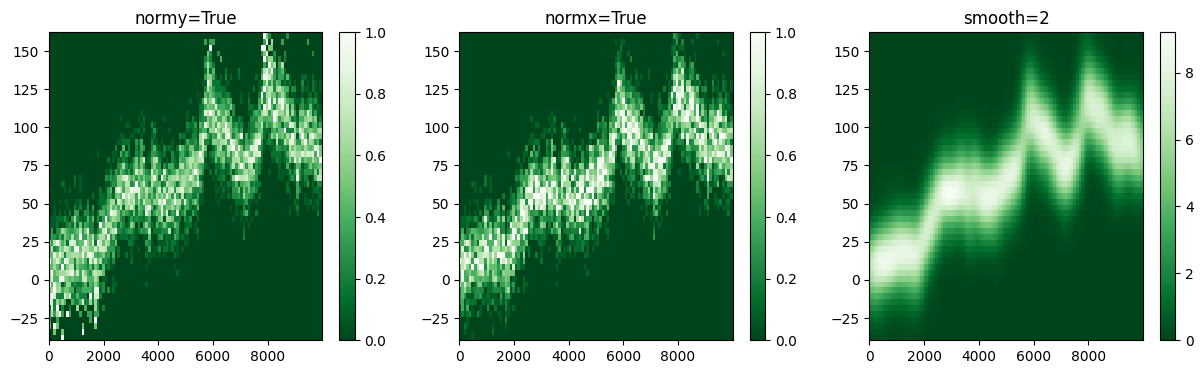

In [14]:
n = 10000
y = np.cumsum(np.random.randn(n)) + 15 * np.random.randn(n)

plt.figure(figsize=(15, 4))

subplotter(1, 3, 0)
ndhist(y, fx=5, normy=True)
title('normy=True')
plt.colorbar()

subplotter(1, 3, 1)
ndhist(y, fx=5, normx=True)
title('normx=True')
plt.colorbar()

subplotter(1, 3, 2)
ndhist(y, fx=5, smooth=2)
title('smooth=2')
plt.colorbar()

plt.show()

### Contour levels

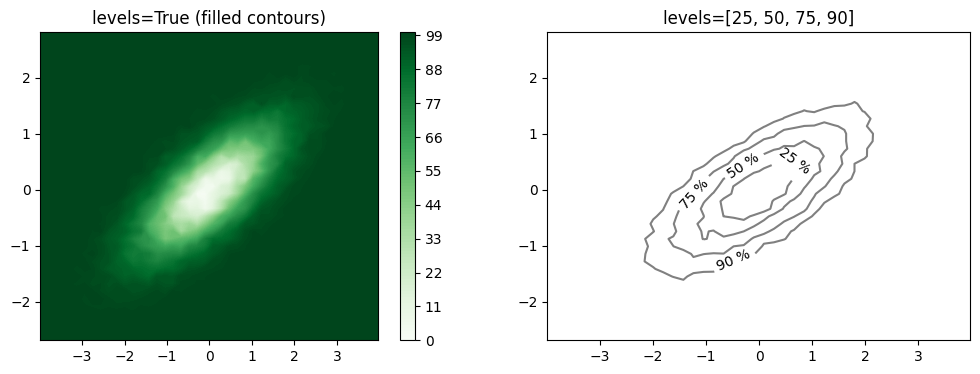

In [15]:
x = np.random.randn(50000)
y = x * 0.5 + np.random.randn(50000) * 0.5

plt.figure(figsize=(12, 4))

subplotter(1, 2, 0)
ndhist(x, y, f=0.5, levels=True)
title('levels=True (filled contours)')
plt.colorbar()

subplotter(1, 2, 1)
ndhist(x, y, f=0.5, levels=[25, 50, 75, 90])
title('levels=[25, 50, 75, 90]')

plt.show()

### Accessing return data

Counts shape: (56, 57)
bins_x length: 57
bins_y length: 58


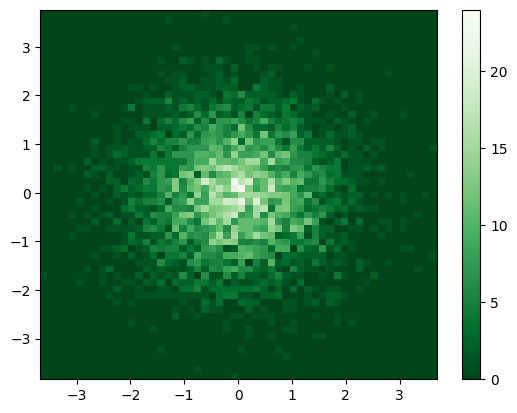

In [16]:
fig = ndhist(np.random.randn(5000), np.random.randn(5000))
print('Counts shape:', fig.ndhist['counts'].shape)
print('bins_x length:', len(fig.ndhist['bins_x']))
print('bins_y length:', len(fig.ndhist['bins_y']))
plt.colorbar()
plt.show()